# Import Libraries

In [1]:
import tweepy
import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.max_columns = 50
pd.options.display.max_rows= 50
pd.options.display.width= 120

# Twitter API Authentication

In [2]:
consumer_key = "" # Use your own key. To get a key https://apps.twitter.com/
consumer_secret = ""

auth = tweepy.OAuthHandler(consumer_key=consumer_key, consumer_secret=consumer_secret)

api = tweepy.API(auth)

# Searching words among recent tweets

In [3]:
results = api.search(q="'HIV'")

In [4]:
len(results)

15

In [5]:
def print_tweet(tweet):
    print ("@%s - %s (%s)" % (tweet.user.screen_name, tweet.user.name, tweet.created_at))
    print (tweet.text)

tweet=results[0]
print_tweet(tweet)

@JaneM_Webb - Jane Webb (2018-07-06 21:38:04)
RT @AMike4761: A pedophile priest with HIV, who admitted to raping 30 young girls between the ages of 5 and 10 years old, has been absolved…


# Visualization of Tweet Information

In [6]:
tweet=results[2]

for param in dir(tweet):
    if not param.startswith("_"):
        print ("%s : %s" % (param, eval("tweet." + param)))

author : User(_api=<tweepy.api.API object at 0x000002119972D8D0>, _json={'id': 368704228, 'id_str': '368704228', 'name': 'OneWillSmith', 'screen_name': 'wl_smith', 'location': 'Atlanta,GA', 'description': '#humanrights #civilrights #LGBT #AntiBullying #NOH8 #Atlanta #Equality #VoterRights #PublicHealth #HIV #HarmReduction #MSM #PrEP #HCV #HPV #vaccines', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'followers_count': 516, 'friends_count': 625, 'listed_count': 21, 'created_at': 'Tue Sep 06 02:43:54 +0000 2011', 'favourites_count': 9290, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': False, 'statuses_count': 13767, 'lang': 'en', 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_background_color': 'ACDED6', 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme18/bg.gif', 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme18/bg.gif', 'profi

In [7]:
user=tweet.author

for param in dir(user):
    if not param.startswith("_"):
        print ("%s : %s" % (param, eval("user." + param)))

contributors_enabled : False
created_at : 2011-09-06 02:43:54
default_profile : False
default_profile_image : False
description : #humanrights #civilrights #LGBT #AntiBullying #NOH8 #Atlanta #Equality #VoterRights #PublicHealth #HIV #HarmReduction #MSM #PrEP #HCV #HPV #vaccines
entities : {'description': {'urls': []}}
favourites_count : 9290
follow : <bound method User.follow of User(_api=<tweepy.api.API object at 0x000002119972D8D0>, _json={'id': 368704228, 'id_str': '368704228', 'name': 'OneWillSmith', 'screen_name': 'wl_smith', 'location': 'Atlanta,GA', 'description': '#humanrights #civilrights #LGBT #AntiBullying #NOH8 #Atlanta #Equality #VoterRights #PublicHealth #HIV #HarmReduction #MSM #PrEP #HCV #HPV #vaccines', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'followers_count': 516, 'friends_count': 625, 'listed_count': 21, 'created_at': 'Tue Sep 06 02:43:54 +0000 2011', 'favourites_count': 9290, 'utc_offset': None, 'time_zone': None, 'geo_enabled': 

In [8]:
user=tweet.author

for param in dir(user):
    if not param.startswith("_"):
        print ("%s : %s" % (param, eval("user." + param)))

contributors_enabled : False
created_at : 2011-09-06 02:43:54
default_profile : False
default_profile_image : False
description : #humanrights #civilrights #LGBT #AntiBullying #NOH8 #Atlanta #Equality #VoterRights #PublicHealth #HIV #HarmReduction #MSM #PrEP #HCV #HPV #vaccines
entities : {'description': {'urls': []}}
favourites_count : 9290
follow : <bound method User.follow of User(_api=<tweepy.api.API object at 0x000002119972D8D0>, _json={'id': 368704228, 'id_str': '368704228', 'name': 'OneWillSmith', 'screen_name': 'wl_smith', 'location': 'Atlanta,GA', 'description': '#humanrights #civilrights #LGBT #AntiBullying #NOH8 #Atlanta #Equality #VoterRights #PublicHealth #HIV #HarmReduction #MSM #PrEP #HCV #HPV #vaccines', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'followers_count': 516, 'friends_count': 625, 'listed_count': 21, 'created_at': 'Tue Sep 06 02:43:54 +0000 2011', 'favourites_count': 9290, 'utc_offset': None, 'time_zone': None, 'geo_enabled': 

In [9]:
results = []
for tweet in tweepy.Cursor(api.search, q="'insomnia', 'can't sleep'").items(100):
    results.append(tweet)

print( len(results))

100


# Data Processing

In [11]:
def process_results(results):
    id_list = [tweet.id for tweet in results]
    data_set = pd.DataFrame(id_list, columns=["id"])

    # Processing Tweet Data

    data_set["text"] = [tweet.text for tweet in results]
    data_set["created_at"] = [tweet.created_at for tweet in results]
    data_set["retweet_count"] = [tweet.retweet_count for tweet in results]
    #data_set["retweeted_status"] = [tweet.retweet_status for tweet in results]
    data_set["favorite_count"] = [tweet.favorite_count for tweet in results]
    data_set["source"] = [tweet.source for tweet in results]

    # Processing User Data
    data_set["user_id"] = [tweet.author.id for tweet in results]
    data_set["user_screen_name"] = [tweet.author.screen_name for tweet in results]
    data_set["user_name"] = [tweet.author.name for tweet in results]
    data_set["user_created_at"] = [tweet.author.created_at for tweet in results]
    data_set["user_description"] = [tweet.author.description for tweet in results]
    data_set["user_followers_count"] = [tweet.author.followers_count for tweet in results]
    data_set["user_friends_count"] = [tweet.author.friends_count for tweet in results]
    data_set["user_location"] = [tweet.author.location for tweet in results]

    return data_set
data_set = process_results(results)

# Result

In [13]:
data_set.head(5)


,id,text,created_at,retweet_count,favorite_count,source,user_id,user_screen_name,user_name,user_created_at,user_description,user_followers_count,user_friends_count,user_location
0,1015317722861891585,Do you work from home? Don't work in your bedr...,2018-07-06 19:33:03,0,0,Buffer,211539670,EatSmartScales,EatSmart Products,2010-11-03 15:03:31,EatSmart Products provides the tools for peopl...,12618,8041,
1,1015313240333549568,Cofee pa more. Can't sleep! Kaasar naman! #...,2018-07-06 19:15:14,0,0,Twitter for Android,54253680,Mhilkz11,Milky Guarin,2009-07-06 16:29:05,"I'm an introvert, easy to get bored when I'm o...",200,159,Quezon City
2,1015307858576060417,If it's true what people say that one sometime...,2018-07-06 18:53:51,0,0,Twitter for iPhone,934491596481089536,HangoutXspot,GXH,2017-11-25 18:38:53,Does it even matter?,727,525,Walmart
3,1015305790100369408,"Sleep is natural, and insomnia is just a learn...",2018-07-06 18:45:38,0,1,Twitter Web Client,4891868852,MattressSaleLiq,Mattress Sale,2016-02-11 08:34:39,Mattress Sale Liquidators was created in 2012 ...,24,81,"Escondido, CA"
4,1015304549475803136,RT @JourneyFog: It’s hard to describe to someo...,2018-07-06 18:40:42,2,0,Twitter for Android,918441767829204997,JoMoss32939881,Jo Moss,2017-10-12 11:42:36,CBD Advocate and Fibromyalgia & ME/CFS Awarene...,120,110,"Norwich, England"


In [14]:
data_set.to_csv('csv_submission.csv', index = False)
# Converting the test predictions in a dataframe as depicted by sample submission
#data_set_temp = pd.DataFrame(data_set,columns=["id"])

#print('Creating and writing submission...')
#fp = open('submit.csv', 'w')
#fp.write(data_set_temp.to_csv())
#print('Finished writing submission')
# Display the submission
#data_set_temp.tail()


In [22]:
data_set.tail(5)

,id,text,created_at,retweet_count,favorite_count,source,user_id,user_screen_name,user_name,user_created_at,user_description,user_followers_count,user_friends_count,user_location
95,963245048501555201,"RT @GrowlyGrego: Suck it, insomnia. You can’t ...",2018-02-13 02:54:50,3,0,Twitter for iPhone,245434294,SuperballRex,Superball Rex,2011-01-31 17:55:37,Californian in Ireland. A little bit of everyt...,723,1646,The Otherworld
96,963243068475543553,"Suck it, insomnia. You can’t lose a moment of ...",2018-02-13 02:46:58,3,15,Twitter for iPhone,258223896,GrowlyGrego,Grego,2011-02-27 06:39:10,what’s a computer?,30644,833,Dallas
97,963239763099742209,Can't sleep..Hi insomnia...who's up....dms mor...,2018-02-13 02:33:50,1,0,Twitter for Android,956292376779264000,Polaris62882359,Polaris,2018-01-24 22:27:24,Sci-fi fantasy conspiracy comic movie tv cospl...,67,785,Universe
98,963236885073186816,Insomnia is going to kill me 🙂. \nI can’t slee...,2018-02-13 02:22:24,0,0,Twitter for iPhone,1215322861,Ireemal_,Reem,2013-02-24 12:10:57,BA in English language and literature.,605,440,ربي سخر لي من يدعو لي بعد موتي
99,963228710257139712,"Insomnia vicious cycle: can't sleep, can't get...",2018-02-13 01:49:55,1,1,Twitter Web Client,22522980,anndanger,Ann Shen,2009-03-02 19:25:41,Illustrator & designer of magical things. Auth...,2076,968,Los Angeles


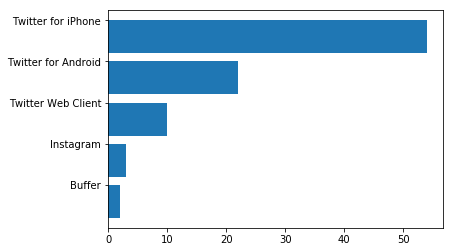

In [15]:
import numpy as np
sources = data_set["source"].value_counts()[:5][::-1]

plt.barh(range(len(sources)), sources.values)
plt.yticks(np.arange(len(sources)) + 0.4, sources.index)
plt.show()

In [17]:
    #processing Twitter Data
    data_set["text"]
    data_set["created_at"]
    data_set["retweet_count"]
    #data_set["retweeted_status"]
    data_set["favorite_count"]
    data_set["source"]

    # Processing User Data
    data_set["user_id"]
    data_set["user_screen_name"]
    data_set["user_name"]
    data_set["user_created_at"]
    data_set["user_description"] 
    data_set["user_followers_count"] 
    data_set["user_friends_count"]
    data_set["user_location"] 

0                                        
1                             Quezon City
2                                 Walmart
3                           Escondido, CA
4                        Norwich, England
5                                  Cimahi
6                                BHS-ENG.
7                                        
8                        Norwich, England
9                               Indonesia
10                        ♥marwa’s heart♥
11                            Philippines
12                             Dallas, TX
13             Loudoun Co., VA (DC-metro)
14               Davao City, Davao Region
15            Republic of the Philippines
16                              Ohio, USA
17                    North Carolina, USA
18                        London, England
19                                  Texas
20                       Denver, Colorado
21                                       
22           Paris, France | Tokyo, Japan
23                                